In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
diabetes = pd.read_csv('diabetes.csv') 
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,NaN,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,NaN,63.0,0
764,2.0,122.0,70.0,NaN,0.0,36.8,0.340,NaN,0
765,5.0,NaN,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,NaN,0.0,30.1,0.349,NaN,1


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


Info shows us various information, such as the number of rows and columns, column names, how many non-null elements in a column we have, the type of a column, the number of types and the memory amount used.

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


Describe shows us various statistics for columns that have numbers as their data. Count tells us how many non-empty rows we have. All columns have all of their data, except for age which lacks some data. Mean shows us the average. Std shows us the devation. Min shows us the smallest number and max the largest. The 25% row shows us the 25% percentile, meaning 25% of our data is more than the number in the column. The same is true for the 50% and 75% rows

In [5]:
total_count = diabetes.shape[0]
for column in diabetes: 
    null_count = total_count - diabetes[column].count()
    null_percentage = 100* (null_count / total_count)
    print("The percentage of null data in", column, "is:", null_percentage, "%\n")

The percentage of null data in Pregnancies is: 17.317708333333336 %

The percentage of null data in Glucose is: 14.84375 %

The percentage of null data in BloodPressure is: 11.458333333333332 %

The percentage of null data in SkinThickness is: 18.75 %

The percentage of null data in Insulin is: 11.458333333333332 %

The percentage of null data in BMI is: 10.9375 %

The percentage of null data in DiabetesPedigreeFunction is: 23.177083333333336 %

The percentage of null data in Age is: 14.713541666666666 %

The percentage of null data in Outcome is: 0.0 %



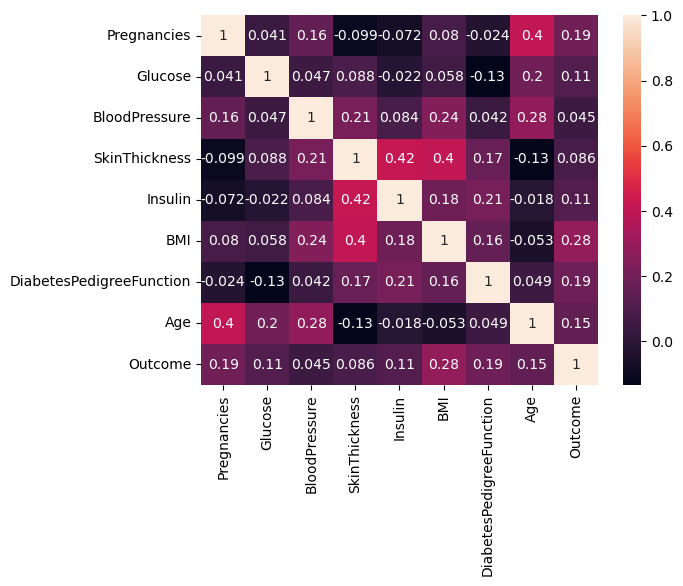

In [6]:
correlation = diabetes.corr()
sn.heatmap(correlation, annot=True)
plt.show()

Insulin and skin thickness, BMI and skin thickness, along with age and pregnancies have the highest correlations with one another.

In [7]:
outcome_corr = correlation["Outcome"].sort_values(ascending = False)
outcome_corr

Outcome                     1.000000
BMI                         0.284374
Pregnancies                 0.193306
DiabetesPedigreeFunction    0.186958
Age                         0.152902
Insulin                     0.112239
Glucose                     0.105518
SkinThickness               0.086170
BloodPressure               0.044803
Name: Outcome, dtype: float64

(Disregard Outcome as the correlation of an element with itself is always 1) We can see that the outcome of whether someone has diabetes or not has the most correlation with the BMI of that person and it has the least correlation with their blood pressure

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

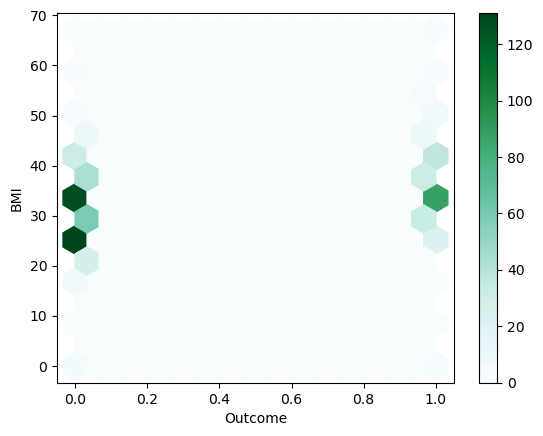

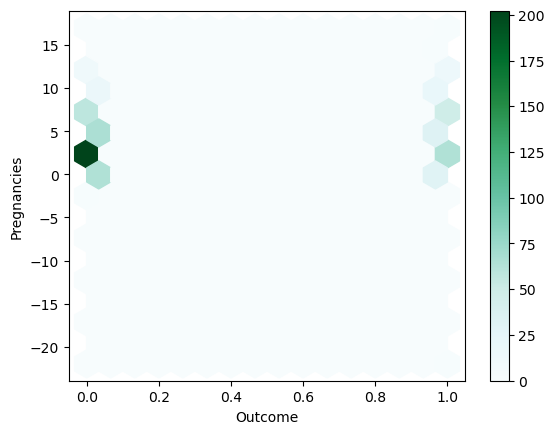

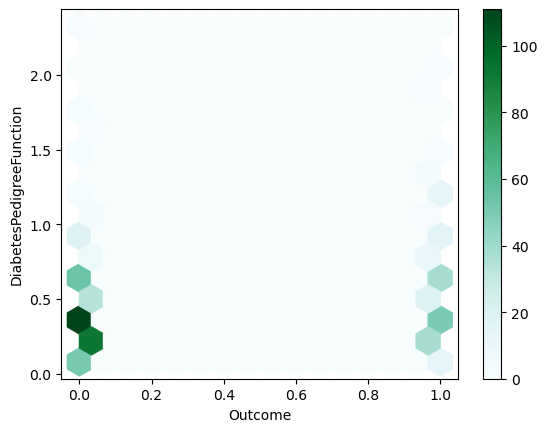

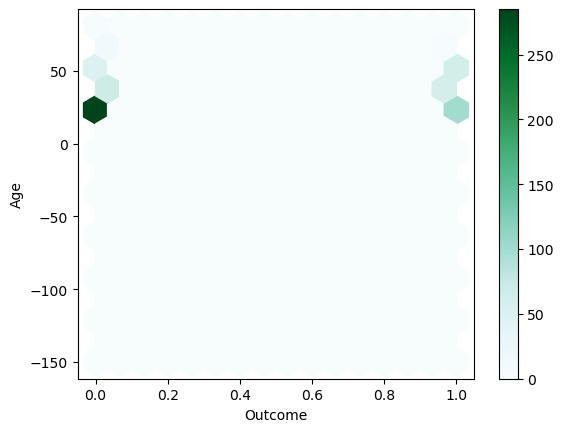

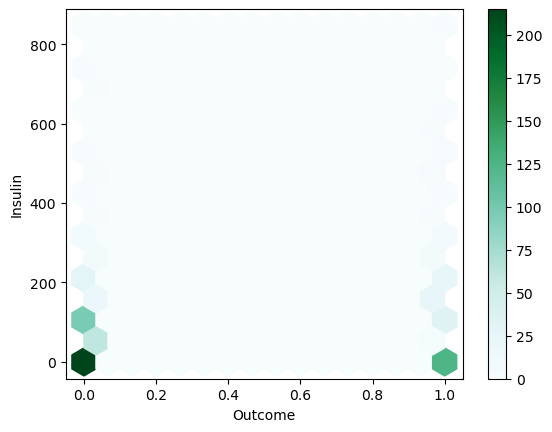

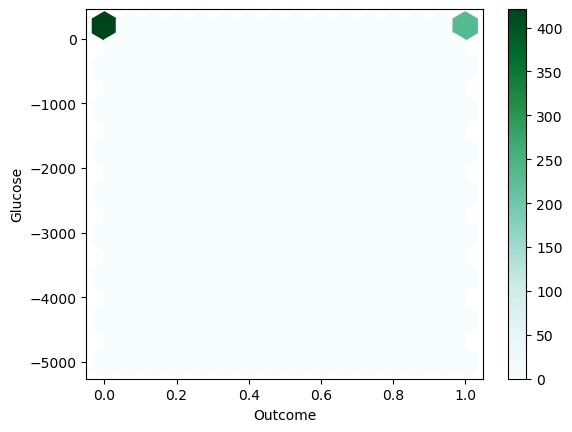

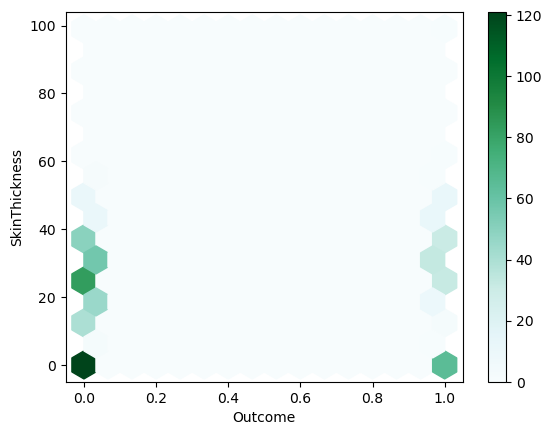

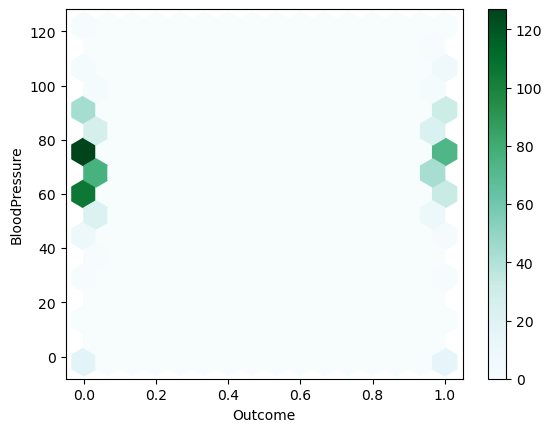

In [8]:
diabetes.plot.hexbin(x='Outcome', y='BMI', gridsize=15)
diabetes.plot.hexbin(x='Outcome', y='Pregnancies', gridsize=15)
diabetes.plot.hexbin(x='Outcome', y='DiabetesPedigreeFunction', gridsize=15)
diabetes.plot.hexbin(x='Outcome', y='Age', gridsize=15)
diabetes.plot.hexbin(x='Outcome', y='Insulin', gridsize=15)
diabetes.plot.hexbin(x='Outcome', y='Glucose', gridsize=15)
diabetes.plot.hexbin(x='Outcome', y='SkinThickness', gridsize=15)
diabetes.plot.hexbin(x='Outcome', y='BloodPressure', gridsize=15)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

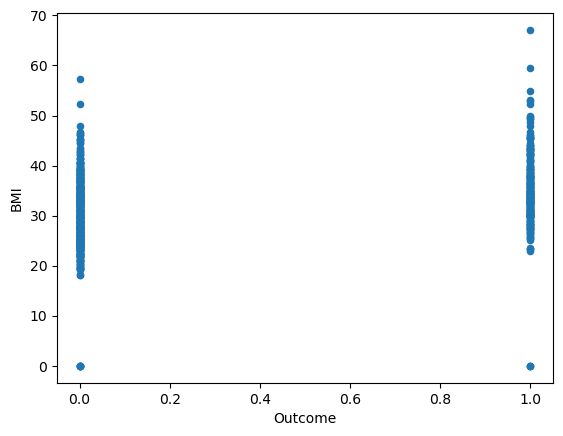

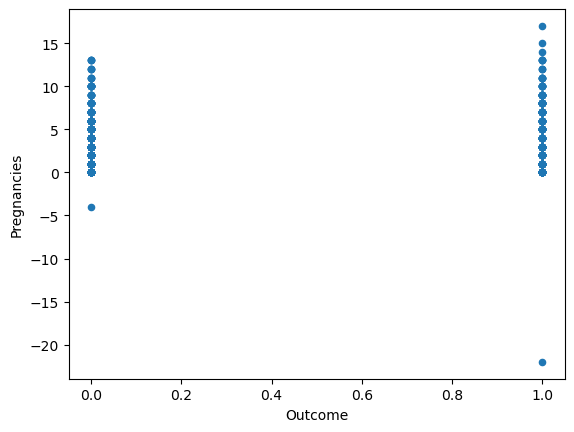

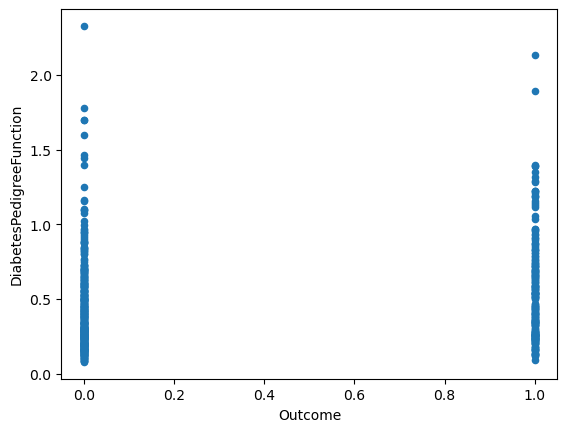

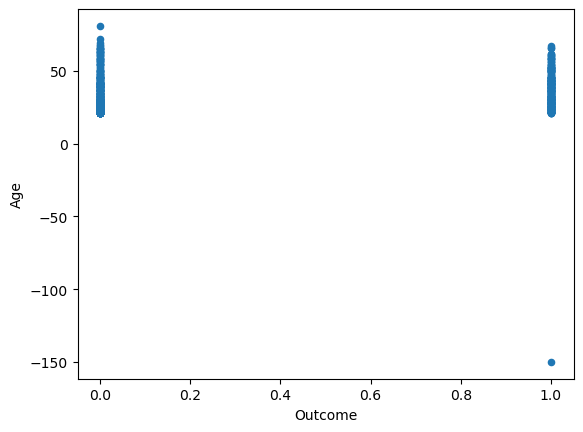

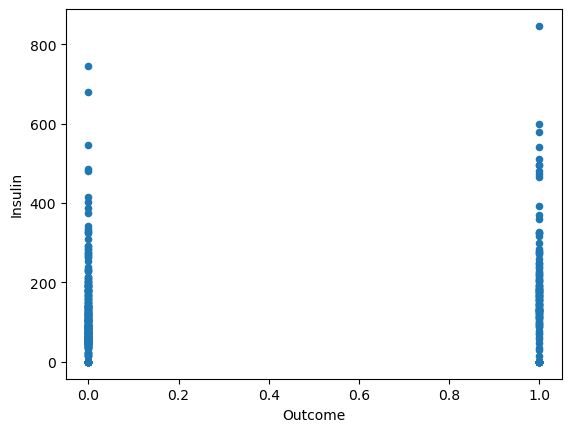

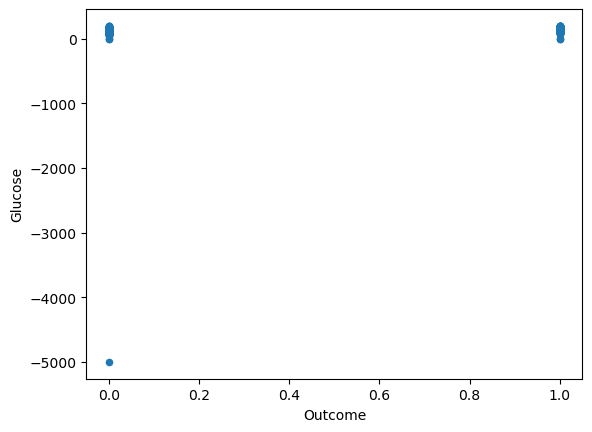

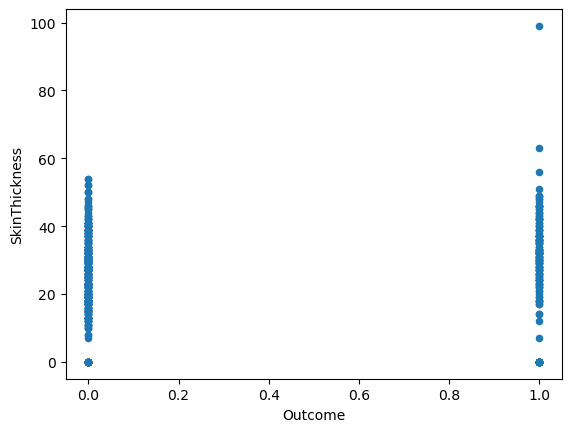

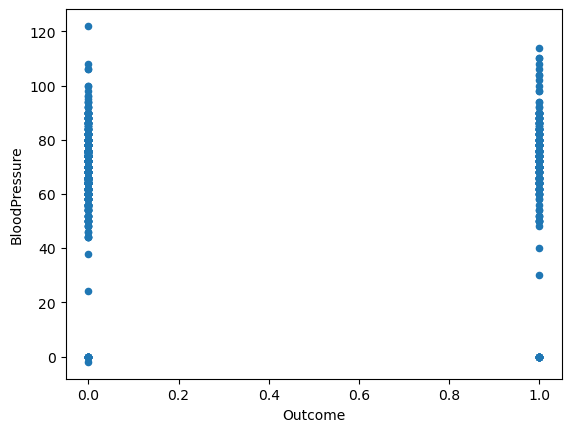

In [9]:
diabetes.plot.scatter(x='Outcome', y='BMI')
diabetes.plot.scatter(x='Outcome', y='Pregnancies')
diabetes.plot.scatter(x='Outcome', y='DiabetesPedigreeFunction')
diabetes.plot.scatter(x='Outcome', y='Age')
diabetes.plot.scatter(x='Outcome', y='Insulin')
diabetes.plot.scatter(x='Outcome', y='Glucose')
diabetes.plot.scatter(x='Outcome', y='SkinThickness')
diabetes.plot.scatter(x='Outcome', y='BloodPressure')

There are many ways to replace and solve the missing values problem. Removing the entire column is an option, especially if the column only has few known datas at best, but otherwise we won't get the desired outcome if we remove columns that have even a few missing values. Removing rows that have missing data is also an option, especially if the row has a lot of missing values, but if not it can mess up the results as it might lead to biases. In both cases we'll lose valuable information.

We can also replace them with means, modes, a random number, previous and next row numbers, and even an arbritrary number. These are better but however they also have drawbacks, mainly that the missing values may have been outliers while we're replacing them frequent numbers instead, causing our data to be more uniform even if it was supposed to be diverse. And the opposite problem might exist if we replace them if random numbers, causing our data to be more diverse even if it was supposed to be uniform

There are however more complex ways to replace missing values. For example, we can use the multivariate approach, in which we'll consider other features as well. For example, since age and pregnancies have a high correlation rate according to our data, then this means that younger people have less pregnancies, and older people have more pregnancies, and we'll consider that when replacing the data. We can also use the Nearest Neighbors Imputations, where a Euclidean distance is used to find the nearest neighbors and use them to replace the missing data. We'll use the 

Diabetes Pedigree Function, skin thickness and pregnancies have the highest missing value rate. We'll replace all missing values with their mean (later with median because it was better actually) for both simplicity and accuracy.

In [10]:
for column in diabetes: 
    column_median = int(diabetes[column].median())
    diabetes[column] = diabetes[column].fillna(column_median)
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.579427,113.953125,69.154948,20.876302,74.838542,32.074479,0.358514,32.545573,0.348958
std,3.209576,187.142725,18.587071,14.444483,109.831102,7.361245,0.344458,12.855247,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,-150.000000,0.000000
25%,1.000000,101.000000,64.000000,10.000000,0.000000,27.800000,0.120250,25.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.274500,29.000000,0.000000
75%,5.000000,136.000000,78.000000,30.000000,115.000000,35.825000,0.534500,39.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


In [11]:
diabetes_std = diabetes.copy()
for column in diabetes:
    print(diabetes[column].mean(), diabetes[column].std())
    diabetes_std[column] = (diabetes[column] - diabetes[column].mean()) / diabetes[column].std()
diabetes_std.describe()

3.5794270833333335 3.2095755826919876
113.953125 187.14272458315546
69.15494791666667 18.587071294134617
20.876302083333332 14.444482969745085
74.83854166666667 109.83110169037916
32.074479166666656 7.361244916224763
0.3585143229166668 0.34445838263795225
32.545572916666664 12.85524689819101
0.3489583333333333 0.4769513772427971


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-1.041195e-16,-4.100091e-17,-2.074079e-16,1.345856e-16,-9.468699e-18,1.458144e-15,-3.502334e-16,2.012279e-16,3.189000e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.969723e+00,-2.732649e+01,-3.828196e+00,-1.445279e+00,-6.813966e-01,-4.357209e+00,-1.040806e+00,-1.420008e+01,-7.316434e-01
25%,-8.036661e-01,-6.921522e-02,-2.773405e-01,-7.529728e-01,-6.813966e-01,-5.806734e-01,-6.917071e-01,-5.869644e-01,-7.316434e-01
50%,-1.805307e-01,1.628102e-02,1.530662e-01,1.470248e-01,-3.718304e-01,-1.011774e-02,-2.439027e-01,-2.758075e-01,-7.316434e-01
75%,4.426046e-01,1.178078e-01,4.758712e-01,6.316389e-01,3.656656e-01,5.094955e-01,5.109055e-01,5.020850e-01,1.365006e+00
max,4.181417e+00,4.544493e-01,2.843108e+00,5.408549e+00,7.021340e+00,4.758097e+00,5.720533e+00,3.769233e+00,1.365006e+00


In [12]:
diabetes_norm = diabetes.copy()
for column in diabetes:
    diabetes_norm[column] = (diabetes[column] - diabetes[column].min()) / (diabetes[column].max() - diabetes[column].min())   
diabetes_norm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.655883,0.983642,0.573830,0.210872,0.088462,0.478010,0.153935,0.790241,0.348958
std,0.082297,0.035996,0.149896,0.145904,0.129824,0.109706,0.147900,0.055650,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.589744,0.981150,0.532258,0.101010,0.000000,0.414307,0.051632,0.757576,0.000000
50%,0.641026,0.984228,0.596774,0.232323,0.040189,0.476900,0.117862,0.774892,0.000000
75%,0.692308,0.987882,0.645161,0.303030,0.135934,0.533905,0.229498,0.818182,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Normalization is used to transform features to a similar scale (a unit hypercube). Best for data that doesn't have outliers as it doesn't do well with them.

Standardization is calculated by subtracting from mean and dividing by standard deviation. It's better to use it when it follows the Gaussian distribution although not necessary. We're essentially only changing the mean and standard deviation and our general distribution is not affected

These are important to machine learning as they lessen the bias towards datasets with larger numbers or longer scales. They also make training and convergance faster.

We can use encoding for categories to convert them into numbers that our algorithms can use. We can remove a category if most of it is very unique and thus there's little to no correlation with the outcome or other datas as they are independent of others.

In [13]:
diabetes_norm = diabetes_norm.drop(["BloodPressure"], axis=1)
diabetes_std = diabetes_std.drop(["BloodPressure"], axis=1)
diabetes_norm.describe()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.655883,0.983642,0.210872,0.088462,0.478010,0.153935,0.790241,0.348958
std,0.082297,0.035996,0.145904,0.129824,0.109706,0.147900,0.055650,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.589744,0.981150,0.101010,0.000000,0.414307,0.051632,0.757576,0.000000
50%,0.641026,0.984228,0.232323,0.040189,0.476900,0.117862,0.774892,0.000000
75%,0.692308,0.987882,0.303030,0.135934,0.533905,0.229498,0.818182,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can remove column that have too many lost data. We can also remove columns that have very low correlation with the outcome or have high correlation with other columns. In this case, we'll only drop blood pressure as it has very low correlation with the outcome.

In [14]:
x = diabetes_norm.drop(["Outcome"], axis = 1)
y = diabetes_norm["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)  

The test rate is usually 70-30 (70% training 30% testing). The test rate shouldn't be too low or too high, as that would result in underfiting and overfiting respectively. The train and test data should be randomly distribted and randomly chosen to avoid biases in our model.

Validation is picking a few of our data to test our hyper parameters. 

In [15]:
tree_model = tree.DecisionTreeClassifier(max_depth = 3) 
tree_model.fit(x_train, y_train) 
predicted_tree = tree_model.predict(x_test)

accuracy = accuracy_score(y_test, predicted_tree)
precision = precision_score(y_test, predicted_tree)
recall = recall_score(y_test, predicted_tree)
print("Accuracy:", accuracy, "\nPrecision:", precision, "\nRecall",recall)

Accuracy: 0.7012987012987013 
Precision: 0.875 
Recall 0.2413793103448276


In [16]:
KNN_model = KNeighborsClassifier(n_neighbors = 6)
KNN_model.fit(x_train, y_train) 
predicted_KNN = KNN_model.predict(x_test) 

accuracy = accuracy_score(y_test, predicted_KNN)
precision = precision_score(y_test, predicted_KNN)
recall = recall_score(y_test, predicted_KNN)
print("Accuracy:", accuracy, "\nPrecision:", precision, "\nRecall",recall)

Accuracy: 0.645021645021645 
Precision: 0.5714285714285714 
Recall 0.22988505747126436


D:\Jupyter Notebook\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
logistic_regression_model = LogisticRegression(random_state=10)
logistic_regression_model.fit(x_train, y_train) 
predicted_logistic_regression = logistic_regression_model.predict(x_test) 

accuracy = accuracy_score(y_test, predicted_logistic_regression)
precision = precision_score(y_test, predicted_logistic_regression)
recall = recall_score(y_test, predicted_logistic_regression)
print("Accuracy:", accuracy, "\nPrecision:", precision, "\nRecall",recall)

Accuracy: 0.645021645021645 
Precision: 0.6666666666666666 
Recall 0.11494252873563218


Overfitting happens when we train our model so much it even models noise. So it does very well on our train data but doesn't do well on our test data. 

Underfitting happens when we haven't trained our model enough and so it does poorly on both train and test data.

By changing the parameters and test-to-train ratio, our models don't have either of these problems. 

In [18]:
tree_hyperparameters = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]} 
clf = GridSearchCV(tree.DecisionTreeClassifier(), tree_hyperparameters) 
clf.fit(x_train, y_train) 

tree_model = tree.DecisionTreeClassifier(**clf.best_params_) 
tree_model.fit(x_train, y_train) 
predicted_tree = tree_model.predict(x_test)

accuracy = accuracy_score(y_test, predicted_tree)
precision = precision_score(y_test, predicted_tree)
recall = recall_score(y_test, predicted_tree)
print("Hyperparameters:", clf.best_params_, "\nAccuracy:", accuracy, "\nPrecision:", precision, "\nRecall",recall)

Hyperparameters: {'max_leaf_nodes': 2, 'min_samples_split': 2} 
Accuracy: 0.7012987012987013 
Precision: 0.875 
Recall 0.2413793103448276


In [19]:
KNN_hyperparameters = {"n_neighbors": list(range(0,100))} 
clf = GridSearchCV(KNeighborsClassifier(), KNN_hyperparameters) 
clf.fit(x_train, y_train) 

D:\Jupyter Notebook\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Jupyter Notebook\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                         22, 23, 24, 25, 26, 27, 28, 29, ...]})

In [20]:
KNN_model = KNeighborsClassifier(**clf.best_params_)
KNN_model.fit(x_train, y_train) 
predicted_KNN = KNN_model.predict(x_test) 

accuracy = accuracy_score(y_test, predicted_KNN)
precision = precision_score(y_test, predicted_KNN)
recall = recall_score(y_test, predicted_KNN)
print("Hyperparameter:", clf.best_params_, "\nAccuracy:", accuracy, "\nPrecision:", precision, "\nRecall",recall)

Hyperparameter: {'n_neighbors': 31} 
Accuracy: 0.6623376623376623 
Precision: 0.6956521739130435 
Recall 0.1839080459770115


D:\Jupyter Notebook\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


I made the blood pressure column stay and nothing changed. I made the empty data stay and it gave me an error. I filled it with the median instead of the mean and it got better so I switched it to the median instead. 

In [35]:
random_forest = RandomForestClassifier(max_depth = 8, random_state = 40)
random_forest.fit(x_train, y_train)
predicted_random_forest = random_forest.predict(x_test) 

accuracy = accuracy_score(y_test, predicted_random_forest)
precision = precision_score(y_test, predicted_random_forest)
recall = recall_score(y_test, predicted_random_forest)
print("Accuracy:", accuracy, "\nPrecision:", precision, "\nRecall",recall)

Accuracy: 0.7186147186147186 
Precision: 0.7894736842105263 
Recall 0.3448275862068966


The random forest is more accurate and has a recall rate, but a lower precision rate. This means that it'll more acurately classify our data and more of the relevant data is retrieved, while less of the total data retrieved is relevant.  

Variance is higher for more complex models which means there's a danger of overfitting, while bias is higher for simpler models which means there's a danger of underfitting. Having more parrallel models increases our variance and decreases our bias. And in this case, it has resulted in more accurate predictions than before.